In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- *amount_tsh* - Total static head (amount water available to waterpoint)
- *date_recorded* - The date the row was entered
- ***funder* - Who funded the well**
- ***gps_height* - Altitude of the well**
- ***installer* - Organization that installed the well**
- ***longitude* - GPS coordinate**
- ***latitude* - GPS coordinate**
- *wpt_name* - Name of the waterpoint if there is one
- *num_private* -
- ***basin* - Geographic water basin**

___

#### Geographic Location

- *subvillage* - Geographic location
- *region* - Geographic location
- *region_code* - Geographic location (coded)
- *district_code* - Geographic location (coded)
- *lga* - Geographic location
- *ward* - Geographic location

___

- ***population* - Population around the well**
- *public_meeting* - True/False
- ***recorded_by* - Group entering this row of data**
- ***scheme_management* - Who operates the waterpoint**
- *scheme_name* - Who operates the waterpoint
- ***permit* - If the waterpoint is permitted**
- ***construction_year* - Year the waterpoint was constructed**

___

#### Water Extraction

- *extraction_type* - The kind of extraction the waterpoint uses
- *extraction_type_group* - The kind of extraction the waterpoint uses
- *extraction_type_class* - The kind of extraction the waterpoint uses

___

- *management* - How the waterpoint is managed
- *management_group* - How the waterpoint is managed
- *payment* - What the water costs
- *payment_type* - What the water costs
- *water_quality* - The quality of the water
- *quality_group* - The quality of the water
- *quantity* - The quantity of water
- *quantity_group* - The quantity of water
- *source* - The source of the water
- *source_type* - The source of the water
- *source_class* - The source of the water
- *waterpoint_type* - The kind of waterpoint
- *waterpoint_type_group* - The kind of waterpoint

In [ ]:
PIT_data_df = pd.read_csv('/content/Pump it Up - Training set Values.csv')
PIT_label_df = pd.read_csv('/content/Pump it Up - Training set Labels.csv')

In [ ]:
merged_PIT_df = PIT_data_df.merge(PIT_label_df,how='inner', on='id')
merged_PIT_df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

## Maps (longitude, latitude)

In [ ]:
map_df = PIT_data_df[PIT_data_df.longitude > 25]
merged_map_df = map_df.merge(PIT_label_df,how='left',on='id')

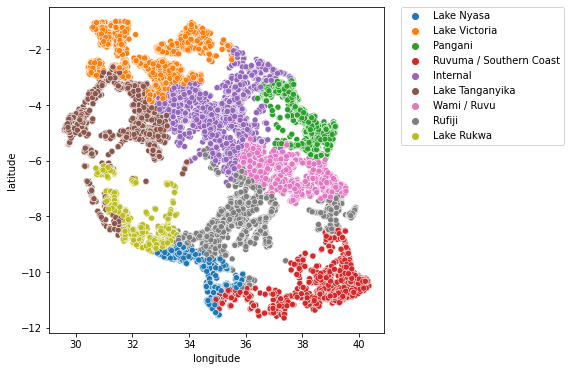

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = merged_map_df.longitude, y = merged_map_df.latitude, hue=merged_map_df.basin)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

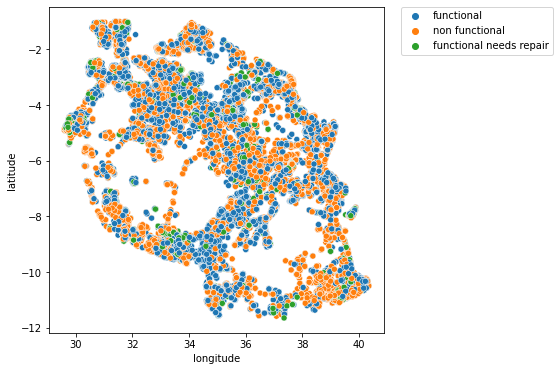

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = merged_map_df.longitude, y = merged_map_df.latitude,hue=merged_map_df.status_group)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

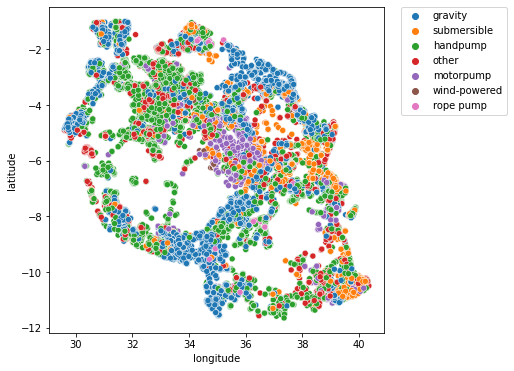

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = merged_map_df.longitude, y = merged_map_df.latitude,hue=merged_map_df.extraction_type_class)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## MI

In [ ]:
X = merged_PIT_df.copy()
y = X.pop("status_group")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

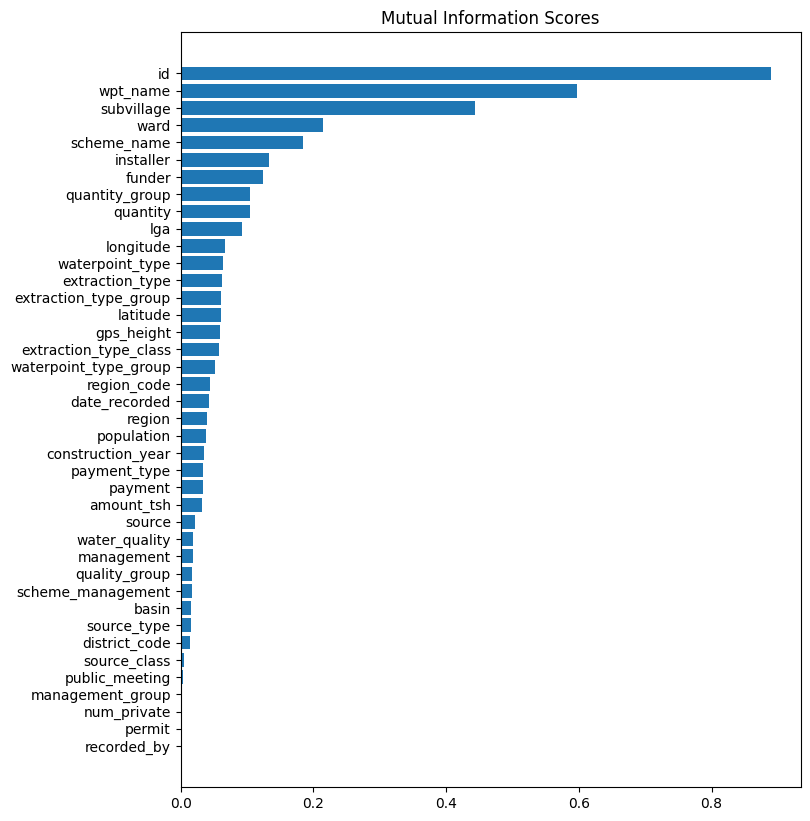

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)

In [ ]:
print(merged_PIT_df.extraction_type.value_counts(),merged_PIT_df.extraction_type_class.value_counts(),merged_PIT_df.extraction_type_group.value_counts())